<a href="https://colab.research.google.com/github/Eduardo775/CENIDET/blob/main/2.%20k_NNModelos_de_predicci%C3%B3n_de_ECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicción de Enfermedades Cardiovasculares

### Importamos las bibliotecas

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Para procesar los datos, aquí las bibliotecas necesarias para dividir el conjunto de datos. Para escalar las características, estoy utilizando StandardScaler.

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importar los diferentes algoritmos de aprendizaje automático que se utilizarán.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  #K Neighbors Classifier

## Técnica de ajuste de hiperparametros
from sklearn.model_selection import GridSearchCV
## Métricas para la evaluación del desempeño
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Leer el conjunto de datos

In [297]:
#read_csv ya que el formato de archivo de los datos descargados es csv
df = pd.read_csv('/content/sample_data/HeartDiseases.csv')

#Separar la variable objetivo de las caracteristicas
X = df.drop('clase', axis=1) #Características
y = df.clase #variable objetivo
#y.head()

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,clase
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
4,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0


In [261]:
#Información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  clase     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Ver la cantidad de valores nulos en cada una de las características
print('Valores nulos\n')
df.isnull().sum()

Valores nulos



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
clase       0
dtype: int64

Utilizando el método _info()_, podemos comprobar la forma del conjunto de datos. Tenemos 303 filas y ningún valor perdido y hay un total de 13 características con una variable objetivo.

#### Feature explanation

1.- EDAD: edad en años
2.- SEXO: sexo (1= masculino; 0= femenino)
3.- CP: tipo de dolor de pecho

        -- Valor 1: angina típica
        -- Valor 2: angina atípica
        -- Valor 3: dolor no anginoso
        -- Valor 4: asintomático

4.-TRESBPS: presión arterial en reposo (en mm Hg al ingreso al hospital)

5.-CHOL: colestoral sérico en mg/dl

6.-FBS: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

7.-RESTECG:resultados electrocardiográficos en reposo

        -- Valor 0: normal
        -- Valor 1: tener anormalidad de onda ST-T (inversiones de onda T y/o ST
                    elevación o depresión de > 0,05 mV)
        -- Valor 2: mostrando hipertrofia ventricular izquierda probable o definitiva según el criterio de Estes

8.-THALACH:frecuencia cardíaca máxima alcanzada

9.-EXANG:angina inducida por ejercicio (1 = sí; 0 = no)

10.-OLDPEAK:depresión del ST inducida por el ejercicio en relación con el reposo

11.-SLOPE: la pendiente del segmento ST de ejercicio máximo

        -- Valor 1: ascendente
        -- Valor 2: plano
        -- Valor 3: descendente

12.-CA:número de vasos principales (0-3) coloreados por fluoroscopia

13.-THAL (thalassemia): 3 = normal; 6 = defecto fijo; 7 = defecto reversible; (trastorno sanguíneo hereditario que hace que tu cuerpo tenga menos hemoglobina de lo normal)

14.-CLASE:diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)

        -- Valor 0: < 50% estrechamiento del diámetro
        -- Valor 1: > 50% estrechamiento del diámetro

#### Comprobación de la relación entre las características con un mapa de correlación y un diagrama de pares

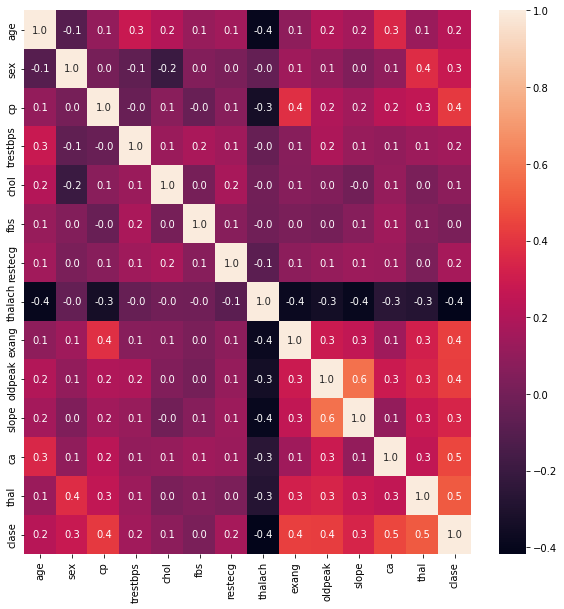

In [262]:
#Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

#### Siempre es una buena práctica trabajar con un conjunto de datos en el que las clases objetivo tengan un tamaño aproximadamente igual. Por lo tanto, vamos a comprobar lo mismo.

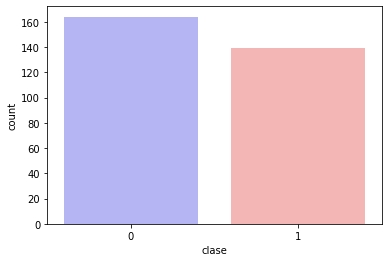

In [263]:
#Distribución class (0= no tiene ECV; 1= si tiene ECV)
sns.countplot(x="clase", data=df, palette="bwr")
plt.show()

Las clases no son exactamente 50%-50% pero la diferencia entre las clases no es significativa, por lo tanto, no tenemos que hacer ningún otro paso.

#### Distribución de registros con respecto al sexo

In [264]:
# Número de instancias que corresponder a mujeres/hombres
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
all_ = len(df.sex)
print("Porcentaje de registros Femeninos: {:.2f}%".format((countFemale / all_*100)))
print("Percentaje de registros Masculino: {:.2f}%".format((countMale / all_*100)))

Porcentaje de registros Femeninos: 32.01%
Percentaje de registros Masculino: 67.99%


En la salida anterior, no existe una proporción igual de personas. Por el momento parece ser el valor de desequilibrio. (**Puede ser un problema**)

In [265]:
# Estadísticos descriptivos por clase
df.groupby('clase').mean()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
clase,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.280488,3.792683
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.136691,5.798561


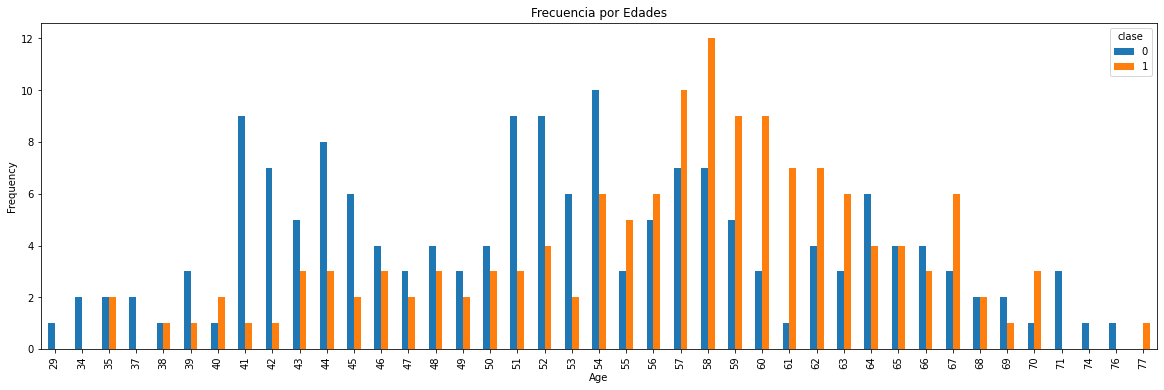

In [266]:
#Distribución por edades
pd.crosstab(df.age,df.clase).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia por Edades')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

####Estandarización de datos

**Necesidad de estandarización**

Antes de entrar en la estandarización, primero comprendamos el concepto de escalado.

El escalado de características es un paso esencial para modelar los algoritmos con los conjuntos de datos. Los datos que generalmente se utilizan con fines de modelado se derivan a través de varios medios, tales como: _Cuestionario, Encuestas, Investigar, Raspado , etc_

Entonces, los datos obtenidos contienen características de varias dimensiones y escalas en total. Las diferentes escalas de las características de los datos afectan negativamente al modelado de un conjunto de datos.

Conduce a un resultado sesgado de las predicciones en términos de errores de clasificación y tasas de precisión. Por lo tanto, es necesario escalar los datos antes del modelado.

Aquí es cuando la **estandarización entra en escena.**

La estandarización es una técnica de escala en la que hace que los datos no tengan escala al convertir la distribución estadística de los datos al siguiente formato:

Media: 0  - Desviación estándar: 1

In [298]:
# Aplicamos filtro de standarizado de las caracteristicas
standardscaler = StandardScaler()
variables = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak','slope', 'ca', 'thal']
#Datos estandarizados
df[variables] = standardscaler.fit_transform(df[variables])



#Comprobamos que efectivamente sea 1 la desviación estandar de cada característica
#df.std()
#df.mean()



### Model Training

In [268]:
#function that will print out all the important details about each training
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Resultado de entrenamiento:\n================================================")
        print(f"Puntaje Accuracy: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"REPORTE DE CLASIFICACIÓN :\n{clf_report}")
        print("_______________________________________________")
        print(f"Matrix de Confusión: \n {confusion_matrix(y_train, pred)}\n")
        #imprimir matriz de confusión
        #cm=confusion_matrix(y_train,pred)
        #fig = px.imshow(cm, text_auto=True)
        #fig.show()

        # Otra forma de graficar un heatmap
        #sns.heatmap(cm,annot=True)
        #plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Resultado de prueba:\n================================================")        
        print(f"Puntaje Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"REPORTE DE CLASIFICACIÓN:\n{clf_report}")
        print("_______________________________________________")
        print(f"Matrix de Confusión: \n {confusion_matrix(y_test, pred)}\n")
        #imprimir matriz de confusión
        #cm=confusion_matrix(y_test,pred)
        #fig = px.imshow(cm, text_auto=True)
        #fig.show()
        
        # Otra forma de graficar un heatmap
        #sns.heatmap(cm,annot=True)
        #plt.show()
        

###IMPORTANTE!
Antes de empezar nuestro entrenamiento, tenemos que dividir nuestro conjunto de datos en conjunto de entrenamiento y de prueba. Si lo tenemos, es el momento de construir un modelo de aprendizaje automático.

In [299]:
#Dividir el conjunto de datos, el 30% será para probar nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

#Selección de caraterísticas
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5) 
selector.fit(X_train, y_train) 
cols = selector.get_support(indices=True) 
cols_names = list(X_train.iloc[:, cols] .columns) 

print(cols_names)

#Nombre de las caracteristica
va=['thalach', 'exang', 'oldpeak', 'ca', 'thal']
#Datos de entrenamiento y prueba con las 5 mejores características (chi2)
X_train= X_train[va]
X_test= X_test[va]
X_test




['thalach', 'exang', 'oldpeak', 'ca', 'thal']


,thalach,exang,oldpeak,ca,thal
179,158,0,0.6,2,6
228,142,1,1.2,1,7
111,173,0,0.2,1,7
246,156,1,1.0,0,0
60,130,0,0.0,1,3
...,...,...,...,...,...
250,161,0,0.0,1,7
19,151,0,1.8,2,3
143,142,0,0.3,2,3
79,154,1,0.6,0,7


### 2. K-nearest neighbour - Cross validation con **Ajuste de Hiperparametro**

Fitting 10 folds for each of 11 candidates, totalling 110 fits
Mejor configuración: {'n_neighbors': 5}
% Desempeño para cada modelo ajustado: [0.74069264 0.74545455 0.77359307 0.73614719 0.72619048 0.73116883
 0.72662338 0.73614719 0.72662338 0.73138528 0.73138528]
Mejor % de desempeño: 0.7735930735930736


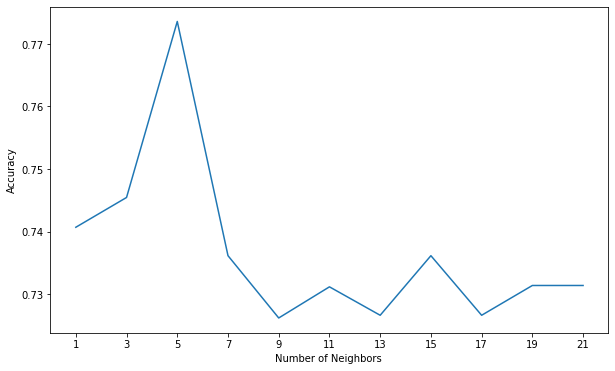

In [254]:
#n_neighbors: número de puntos que considera para comparar el nuevo punto
#weights: sirve para dar peso a los puntos que están cerca y menos peso a los puntos que están más lejos.

# Especificamos las variables de decisión y para cada una de ellas su espacio de búsqueda
params = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21]}#,'weights' : ['uniform','distance']}
#params = { 'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}

#Creamos una instancia del clasificador
knn_clf = KNeighborsClassifier()

#Preparamos la técnica de optimización
knn_cv = GridSearchCV(knn_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)

#Entrenamos el modelo
knn_cv.fit(X_train, y_train)

#Recuperamos la combinación de hiperparámetros óptima
BestParams=knn_cv.best_params_
print(f"Mejor configuración: {BestParams}")

#Lista de porcentaje de desempeño por cada modelo ajustado
grid_scores = knn_cv.cv_results_['mean_test_score']
print(f"% Desempeño para cada modelo ajustado: {grid_scores}")

#Mejor porcentaje de desempeño
best_score = knn_cv.best_score_
print(f"Mejor % de desempeño: {best_score}")

#Graficamos el desempeño de cada uno de los modelos ajustados
loc = 1,3,5,7,9,11,13,15,17,19,21
plt.figure(figsize = (10, 6))
plt.plot(loc,grid_scores)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()


In [256]:
from sklearn import neighbors
#Con la combinación más óptima instanciamos un nuevo clasificador
knn_clf_tuned = KNeighborsClassifier(**BestParams)

#Entrenamos el modelo
knn_clf_tuned.fit(X_train, y_train)

#Mostramos los valores de las métricas de desempeño
print_score(knn_clf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf_tuned, X_train, y_train, X_test, y_test, train=False)

Resultado de entrenamiento:
Puntaje Accuracy: 83.02%
_______________________________________________
REPORTE DE CLASIFICACIÓN :
                    0          1  accuracy   macro avg  weighted avg
precision    0.843478   0.814433  0.830189    0.828956      0.830189
recall       0.843478   0.814433  0.830189    0.828956      0.830189
f1-score     0.843478   0.814433  0.830189    0.828956      0.830189
support    115.000000  97.000000  0.830189  212.000000    212.000000
_______________________________________________
Matrix de Confusión: 
 [[97 18]
 [18 79]]

Resultado de prueba:
Puntaje Accuracy: 75.82%
_______________________________________________
REPORTE DE CLASIFICACIÓN:
                   0          1  accuracy  macro avg  weighted avg
precision   0.754717   0.763158  0.758242   0.758937      0.758613
recall      0.816327   0.690476  0.758242   0.753401      0.758242
f1-score    0.784314   0.725000  0.758242   0.754657      0.756938
support    49.000000  42.000000  0.758242  91.00